 # CMSC 6950 Project on Canadian Covid19 data

In [56]:
# read data
%matplotlib notebook
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [57]:
url = "https://health-infobase.canada.ca/src/data/covidLive/covid19.csv"
gets_data = requests.get(url, allow_redirects=True)

open("data.csv", 'wb').write(gets_data.content)

175718

In [58]:
df = pd.read_csv("data.csv")
df = df[df.prname != 'Canada']
df.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,ratetested,numtoday,percentoday,ratetotal,ratedeaths,deathstoday,percentdeath,testedtoday,recoveredtoday,percentactive
0,35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,...,NaN,3,300.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,...,NaN,1,100.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0
3,35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,...,NaN,0,0.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,...,NaN,3,300.0,0.08,0.0,0.0,0.0,NaN,NaN,100.0
6,35,Ontario,Ontario,16-02-2020,3,0,0.0,3,NaN,NaN,...,NaN,0,0.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0


In [59]:
def making_new_dataframe(main_col, col4_num):
    """ Returns the new DataFrame.
        
        Parameters:
            main_col (str): The column of the main dataframe whose values will be column for new dataframe.
            
            col4_num (str): The column of the main dataframe whose values will be stored as data in new dataframe.
            
        Returns:
            graph_df: Returns the new DataFrame  
    
    """
    graph_df = pd.DataFrame()

    for province in df[main_col].unique():
#         print(province)
        province_df = df.copy()[df[main_col]==province]
        province_df.set_index("date", inplace=True)
        province_df[f"{province}"] = province_df[col4_num]

        if graph_df.empty:
            graph_df = province_df[[f"{province}"]]
        else:
            graph_df = graph_df.join(province_df[f"{province}"])
    return graph_df

1. Plot for total cases in each province and territories over time 

In [66]:
for_total_cases = making_new_dataframe("prname","numconf")
for_total_cases.tail()

,Ontario,British Columbia,Quebec,Alberta,Saskatchewan,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Prince Edward Island,Northwest Territories,Nunavut,Yukon,Repatriated travellers
date,,,,,,,,,,,,,,
17-06-2020,32744,2775,54263.0,7530.0,693.0,295.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
18-06-2020,32917,2783,54383.0,7579.0,708.0,297.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
19-06-2020,33095,2790,54550.0,7625.0,716.0,300.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
20-06-2020,33301,2790,54674.0,7673.0,726.0,302.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
21-06-2020,33476,2790,54766.0,7704.0,746.0,302.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0


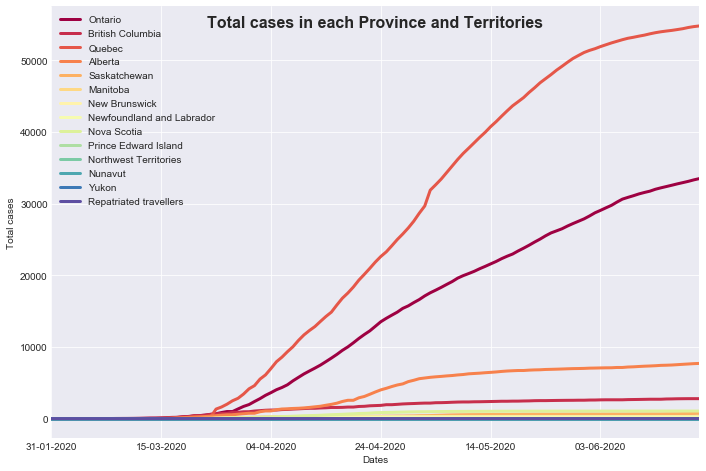

In [62]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
for_total_cases.fillna(0).plot(lw=3,cmap="Spectral",ax=ax)
fig.suptitle("Total cases in each Province and Territories", fontsize=16, fontweight="bold")
ax.set(xlabel="Dates",
      ylabel="Total cases")
ax.legend(loc=0).set_visible(True)

2. Plot for number of individuals tested in each province over time

In [65]:
for_num_test = making_new_dataframe("prname","numtested")
for_num_test.tail()

,Ontario,British Columbia,Quebec,Alberta,Saskatchewan,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Prince Edward Island,Northwest Territories,Nunavut,Yukon,Repatriated travellers
date,,,,,,,,,,,,,,
17-06-2020,1036393.0,146712.0,533133.0,318276.0,51127.0,54204.0,34992.0,15091.0,50893.0,9163.0,2227.0,949.0,1245.0,76.0
18-06-2020,1060845.0,148500.0,538818.0,324964.0,51644.0,54842.0,35355.0,15303.0,51358.0,9286.0,2231.0,968.0,1250.0,76.0
19-06-2020,1087179.0,149929.0,545165.0,332766.0,52278.0,55401.0,35619.0,15539.0,51658.0,9490.0,2239.0,974.0,1250.0,76.0
20-06-2020,1113671.0,151626.0,551352.0,339165.0,52798.0,56147.0,36184.0,15700.0,51943.0,9647.0,2239.0,983.0,1250.0,76.0
21-06-2020,1136313.0,152568.0,551352.0,345952.0,53481.0,56847.0,36375.0,15960.0,52229.0,9810.0,2239.0,989.0,1250.0,76.0


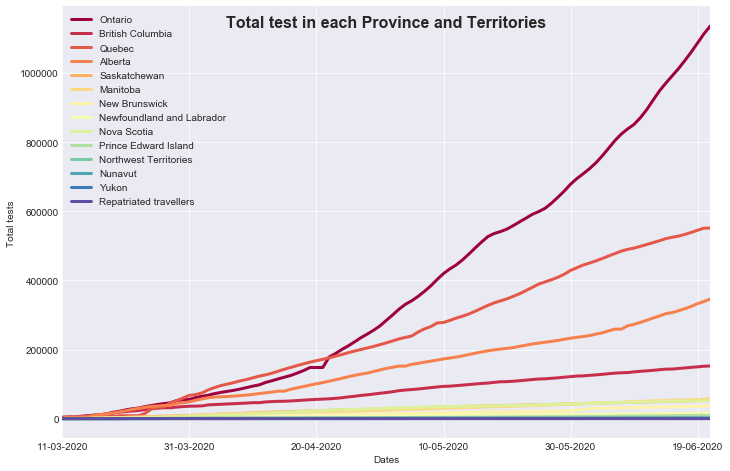

In [68]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
for_num_test.dropna().plot(lw=3,cmap="Spectral",ax=ax)
fig.suptitle("Total test in each Province and Territories", fontsize=16, fontweight="bold")
ax.set(xlabel="Dates",
      ylabel="Total tests")
ax.legend(loc=0).set_visible(True);

[Text(0, 0, 'Ontario'),
 Text(0, 0, 'British Columbia'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Quebec'),
 Text(0, 0, 'Alberta'),
 Text(0, 0, 'Saskatchewan'),
 Text(0, 0, 'Manitoba'),
 Text(0, 0, 'New Brunswick'),
 Text(0, 0, 'Newfoundland and Labrador'),
 Text(0, 0, 'Nova Scotia'),
 Text(0, 0, 'Prince Edward Island'),
 Text(0, 0, 'Northwest Territories'),
 Text(0, 0, 'Nunavut'),
 Text(0, 0, 'Yukon'),
 Text(0, 0, 'Repatriated travellers')]

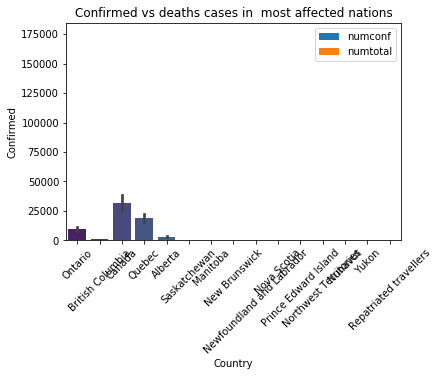

In [10]:
import seaborn as sns
df[['numconf','numtotal','prname']].plot(kind='bar', stacked=True)
chart = sns.barplot(
    data=df,
    x= df['prname'],
    y = df['numconf'],
    palette='viridis'
)
chart.set(xlabel='Country', ylabel='Confirmed', title = 'Confirmed vs deaths cases in  most affected nations')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Ontario'),
 Text(0, 0, 'British Columbia'),
 Text(0, 0, 'Quebec'),
 Text(0, 0, 'Alberta'),
 Text(0, 0, 'Saskatchewan'),
 Text(0, 0, 'Manitoba'),
 Text(0, 0, 'New Brunswick'),
 Text(0, 0, 'Newfoundland and Labrador'),
 Text(0, 0, 'Nova Scotia'),
 Text(0, 0, 'Prince Edward Island'),
 Text(0, 0, 'Northwest Territories'),
 Text(0, 0, 'Nunavut'),
 Text(0, 0, 'Yukon'),
 Text(0, 0, 'Repatriated travellers')]

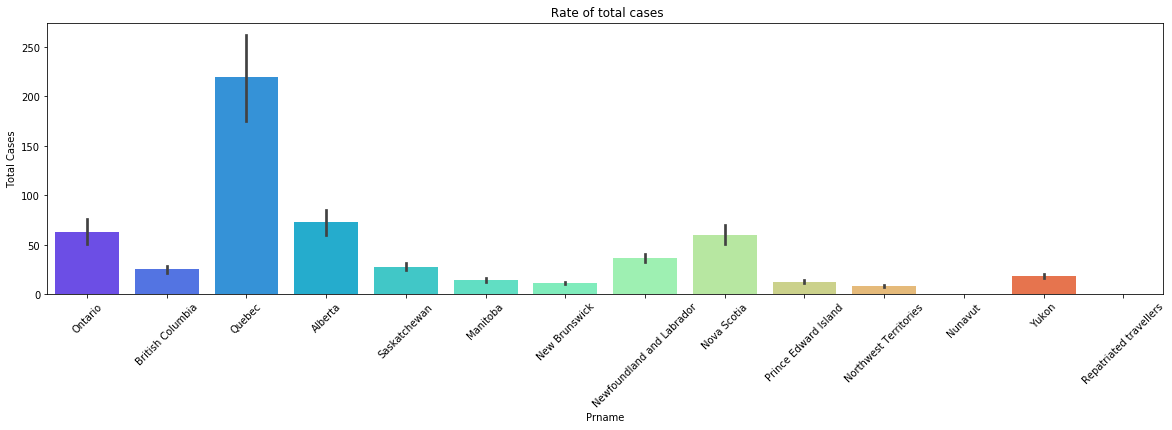

In [11]:
df2=df[df.prname != 'Canada']
plt.figure(figsize=(20,5))
chart = sns.barplot(
    data=df2,
    x= 'prname',
    y = 'ratetotal',
    palette='rainbow'
)
chart.set(xlabel='Prname', ylabel='Total Cases', title = ' Rate of total cases')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [12]:
Confirmed = df.groupby(['prname']).sum()

In [13]:
fig = px.line(df, x="date", y="numconf")


fig.update_layout(title_text="numconf",                  title_font_size=30)
fig.show()
#Temp_nan

In [14]:
df=df[df.prname != 'Canada']
import plotly.express as px
df = df
fig = px.line(df, x="date", y="numtotal", color="prname", line_group="prname")
fig.show()
#switch line to area to have are 


In [15]:
import plotly.express as px
fig = px.scatter(df, x="numconf", y="date", size="numconf", color="prname",
           hover_name="prname", log_x=True, size_max=60)
fig.show()

In [16]:
df=df[df.prname == 'Quebec']
fig = px.line(df, x = 'date', y = 'numtotal', title='nothing')
fig.show()

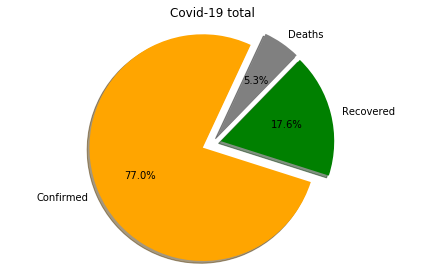

On 01-03-2020  - - - Confirmed: 1629303; Recovered: 372967.0; Deaths: 112807.0.


In [17]:
df[df.prname == 'Canada']
Confirmed =df.numconf.sum()
Deaths = df.numdeaths.sum()
Recovered = df.numrecover.sum()

sizes = [Confirmed, Recovered, Deaths]
labels = ['Confirmed', 'Recovered', 'Deaths']

explode = (0.1, 0.07,0.07)
fig1, ax1 = plt.subplots()
ax1.set_title('Covid-19 total')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=65, colors = ['orange','green','grey'])

ax1.axis('equal')  
plt.tight_layout()
plt.show()
print('On {}  - - - Confirmed: {}; Recovered: {}; Deaths: {}.'.format(list(df.date)[0],
                                                                      Confirmed,Recovered,Deaths))


In [18]:
from colorama import Fore, Back, Style
closed = int(df.numdeaths.sum()+df.numrecover.sum())
active = int(df.numconf.sum() - closed)
print(Fore.CYAN, 'Closed cases: ', closed)
print('Active cases:', active)
print('Cases which had an outcome: \n Recovered: {} ({}%) \n Deaths: {} ({}%)'.format(
            int(df.numrecover.sum()), ((df.numrecover.sum()/closed)*100).round(2),
            int(df.numdeaths.sum()), ((df.numdeaths.sum()/closed)*100).round(2)))

 Closed cases:  485774
Active cases: 1143529
Cases which had an outcome: 
 Recovered: 372967 (76.78%) 
 Deaths: 112807 (23.22%)
